In [1]:
!pip install tensorflow
import tensorflow
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/sample_data/all_apple_stock_data.csv")
df.head(5)

,Date,Close/Last,Volume,Open,High,Low,Unnamed: 6,Date.1,High.1
0,8/4/2023,$181.99,115956800,$185.52,$187.38,$181.92,NaN,8/4/2023,187.38
1,8/3/2023,$191.17,62243280,$191.57,$192.37,$190.69,NaN,8/3/2023,192.37
2,8/2/2023,$192.58,50389330,$195.04,$195.18,$191.85,NaN,8/2/2023,195.18
3,8/1/2023,$195.61,35281430,$196.24,$196.73,$195.28,NaN,8/1/2023,196.73
4,7/31/2023,$196.45,38824110,$196.06,$196.49,$195.26,NaN,7/31/2023,196.49


In [3]:
df.columns

Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low', 'Unnamed: 6',
       'Date.1', 'High.1'],
      dtype='object')

In [4]:
df1 = df[["Open"]].values
df1

array([['$185.52 '],
       ['$191.57 '],
       ['$195.04 '],
       ['$196.24 '],
       ['$196.06 '],
       ['$194.67 '],
       ['$196.02 '],
       ['$193.67 '],
       ['$193.33 '],
       ['$193.41 '],
       ['$194.10 '],
       ['$195.09 '],
       ['$193.10 '],
       ['$193.35 '],
       ['$191.90 '],
       ['$190.23 '],
       ['$190.50 '],
       ['$189.68 '],
       ['$189.16 '],
       ['$189.26 '],
       ['$191.41 '],
       ['$189.84 '],
       ['$191.57 '],
       ['$193.78 '],
       ['$191.63 '],
       ['$189.08 '],
       ['$187.93 '],
       ['$185.89 '],
       ['$186.83 '],
       ['$185.55 '],
       ['$183.74 '],
       ['$184.90 '],
       ['$184.41 '],
       ['$186.73 '],
       ['$183.96 '],
       ['$183.37 '],
       ['$182.80 '],
       ['$181.27 '],
       ['$181.50 '],
       ['$177.90 '],
       ['$178.44 '],
       ['$179.97 '],
       ['$182.63 '],
       ['$181.03 '],
       ['$177.70 '],
       ['$177.33 '],
       ['$176.96 '],
       ['$173

In [5]:
df1 = df['Open'].replace({'\$': '', ',':''}, regex=True).astype(float)
df1

,Open
0,185.52
1,191.57
2,195.04
3,196.24
4,196.06
5,194.67
6,196.02
7,193.67
8,193.33
9,193.41


In [6]:
print(df1.shape)

(125,)


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1));df1

array([[0.79328963],
       [0.90994987],
       [0.97686078],
       [1.        ],
       [0.99652912],
       [0.96972619],
       [0.99575781],
       [0.9504435 ],
       [0.94388739],
       [0.94543   ],
       [0.95873506],
       [0.97782491],
       [0.93945237],
       [0.94427304],
       [0.91631315],
       [0.88411107],
       [0.88931739],
       [0.87350559],
       [0.8634786 ],
       [0.86540686],
       [0.90686464],
       [0.87659082],
       [0.90994987],
       [0.9525646 ],
       [0.91110683],
       [0.86193598],
       [0.83976089],
       [0.80042422],
       [0.81854994],
       [0.79386811],
       [0.75896645],
       [0.78133436],
       [0.77188585],
       [0.81662167],
       [0.76320864],
       [0.75183185],
       [0.74084073],
       [0.71133822],
       [0.71577324],
       [0.64635557],
       [0.65676822],
       [0.68627073],
       [0.73756267],
       [0.70671037],
       [0.64249904],
       [0.63536444],
       [0.62822985],
       [0.558

In [8]:
num_of_prices = len(df1)
print(len(df1))

125


In [9]:
apple_price_features = [] #feature group-input values-xs
apple_price_labels = [] #label group-output values-ys-predicted values of the future price
for i in range(10, (num_of_prices)):
  apple_price_features.append(df1[i-10:i, 0])#the feature values between 0 to 9 of df1 scaled, grouping
  #grouping the feature values in group of 10
  apple_price_labels.append(df1[i,0])#1 number for 10 inputs or 1 output for 10 inputs
  #for each group of 10 we will get 1 output.

In [10]:
x_train =  np.array(apple_price_features[0:100])
y_train = np.array(apple_price_labels[0:100])

In [11]:
print(x_train.shape)
print(y_train.shape)

(100, 10)
(100,)


In [12]:
x_test=np.array(apple_price_features[101:])
y_test=np.array(apple_price_labels[101:])
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1)) #In neaural network
#we will provide data a 3-dimensional format. The first output provides with the rows x_test.shape[0]
#x_test[1] provides us infos on the cols
#x_test[1], 1-the last 1 provides the 3 dimensional shape
print(x_test.shape)

(14, 10, 1)


In [13]:
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM #Keras from tensorflow builds the neural network
from tensorflow.keras.models import Model #over here we are using the Relu model or the activation function

In [14]:
#Long Short-Term Memory (LSTM) is a type of Recurrent Neural Network(RNN)
#that is specifically designed to handle sequential data, such as time series,
#speech, and text
input_layer = Input(shape = (x_train.shape[1],1))
lstm1 = LSTM(100,activation = 'relu', return_sequences = True)(input_layer)
drop1 = Dropout(0.1)(lstm1)
lstm2 = LSTM(120, activation='relu', return_sequences = True)(drop1)
lstm3 = LSTM(80, activation='relu', return_sequences = True)(lstm2)
lstm4 = LSTM(50, activation='relu')(lstm3)
output_layer = Dense(1)(lstm4)
model = Model(input_layer, output_layer)
model.compile(optimizer = 'adam', loss='mse')
print(model.summary())
print(x_train.shape)
print(y_train.shape)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 10, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 10, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 120)           106080    
                                                                 
 lstm_2 (LSTM)               (None, 10, 80)            64320     
                                                                 
 lstm_3 (LSTM)               (None, 50)                26200     
                                                                 
 dense (Dense)               (None, 1)                 51    

In [15]:
#model_history is the model verbose, providing us with the information of te model
model_history = model.fit(x_train, y_train, batch_size = 20, epochs = 100, validation_data =(x_test,y_test), verbose=1,)

Epoch 1/100
5/5 [==============================] - 13s 457ms/step - loss: 0.3181 - val_loss: 0.0098
Epoch 2/100
5/5 [==============================] - 0s 57ms/step - loss: 0.2394 - val_loss: 0.0016
Epoch 3/100
5/5 [==============================] - 0s 68ms/step - loss: 0.0796 - val_loss: 0.0555
Epoch 4/100
5/5 [==============================] - 0s 55ms/step - loss: 0.0449 - val_loss: 0.0310
Epoch 5/100
5/5 [==============================] - 0s 73ms/step - loss: 0.0301 - val_loss: 0.0158
Epoch 6/100
5/5 [==============================] - 1s 115ms/step - loss: 0.0336 - val_loss: 0.0259
Epoch 7/100
5/5 [==============================] - 0s 88ms/step - loss: 0.0207 - val_loss: 0.0445
Epoch 8/100
5/5 [==============================] - 0s 65ms/step - loss: 0.0196 - val_loss: 0.0239
Epoch 9/100
5/5 [==============================] - 0s 50ms/step - loss: 0.0152 - val_loss: 0.0138
Epoch 10/100
5/5 [==============================] - 0s 70ms/step - loss: 0.0108 - val_loss: 0.0148
Epoch 11/100
5/5

In [16]:
y_pred = model.predict(x_test)
print(y_pred.shape)

1/1 [==============================] - 1s 723ms/step
(14, 1)


In [17]:
y_pred = scaler.inverse_transform(y_pred)#here the inverse transform means the scaled data got back the
#original format
print(y_pred)

[[146.0226 ]
 [147.24915]
 [146.70024]
 [146.42021]
 [145.46571]
 [144.49483]
 [144.30148]
 [144.49979]
 [144.56177]
 [144.66222]
 [144.75983]
 [145.202  ]
 [145.21388]
 [145.8679 ]]


In [18]:
y_test = y_test.reshape(-1,1)
y_test = scaler.inverse_transform(y_test) #rescaling or reconverting in the original format
print(y_test)

[[147.11]
 [150.09]
 [148.87]
 [150.2 ]
 [152.35]
 [153.51]
 [153.11]
 [152.12]
 [150.95]
 [149.46]
 [153.78]
 [153.88]
 [150.64]
 [152.58]]


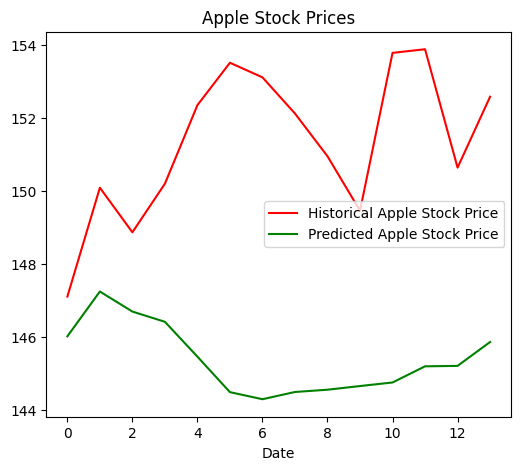

In [19]:
plt.figure(figsize=(6,5))#plotting the prices making a comparison between the price now and the price in the future
plt.plot(y_test, color = 'red', label="Historical Apple Stock Price")
plt.plot(y_pred, color='green', label='Predicted Apple Stock Price')
plt.title('Apple Stock Prices')
plt.xlabel('Date')
plt.legend()
plt.show()

In [20]:
#How model will perform on new data, these are random apple stock price
#We can choose new prices other than these
new_array = np.array([142, 141, 140, 144, 146, 148, 149, 149, 148])
new_array = new_array.reshape(-1,1)
print(new_array)
print(new_array.shape)

[[142]
 [141]
 [140]
 [144]
 [146]
 [148]
 [149]
 [149]
 [148]]
(9, 1)


In [21]:
new_array_scaled = scaler.fit_transform(new_array)#The fit_transform method computes the mean and standard deviation
#The resulting scaled data is stored in new_array_scaled
new_array_scaled = np.reshape(new_array_scaled, (1,9,1))#Features, rows, and 1 for providing 3-dimensional feature
print(new_array_scaled.shape)
print(new_array_scaled)

(1, 9, 1)
[[[0.22222222]
  [0.11111111]
  [0.        ]
  [0.44444444]
  [0.66666667]
  [0.88888889]
  [1.        ]
  [1.        ]
  [0.88888889]]]


In [22]:
new_pred = model.predict(new_array_scaled)

1/1 [==============================] - 1s 815ms/step


In [23]:
new_pred = scaler.inverse_transform(new_pred)#inverse_transform method of the scaler object to reverse the scaling
#In other words, it transforms scaled prdictions back to their original scale
#Twofold throws away the outlier
print('We predict the price of Apple Stock will be: ')
print(*new_pred[0])

We predict the price of Apple Stock will be: 
141.50517
